# Regression


<br/>
<br/>
<center>
<img src="images/underfitting_overfitting.png" width="800">
</center>

This lecture will discuss basic types of regression algorithms and explore strategies for optimizing and improving regression models. The focus will be on linear and pseudo/generalized linear problems, with some limited examples of non-linear regression.

* Regression basics
    - Problem statement for regression
    - Properties of error distributions
    - Accuracy metrics

* Improving models by adding features
    - Generating non-linear features
    - Colinearity of features
    - Principal Component Regression and Partial Least Squares
    - Regularization of coefficients
    - Kernel ridge regression

* Improving performance by changing models
    - Non-linear regression
    - Neural networks
    - kNN regression

* Quantifying uncertainty
    - Standard deviation of error
    - Ensembles from re-sampling
    - Gaussian process regression

## Regression basics

### Regression problem statement

$\vec{y} = f(\vec{x}) + \vec{\epsilon}$

where the output, $\vec{y}$, is a vector (or scalar) of continuous, real values, $f$ is the model, $\vec{x}$ is a vector (or scalar) of input features, and $\vec{epsilon}$ is an error between the real and predicted values. It is common to write the predicted values as $\vec{\hat{y}}$:

$\vec{\hat{y}} = f(\vec{x})$

such that $\vec{\epsilon}$ = $\vec{y} - \vec{\hat{y}}$.

The goal of regression is to minimize the error, $\vec{\epsilon}$.

### Properties of error distributions

The distribution of errors, or "residuals" contains a lot of information about the performance of a model. There are two common classes of error distributions:

* Normal (or Gaussian) vs. Non-normal error distributions


Determined by how well the error distribution is described by the Gaussian probability distribution:

<center>
<img src="images/normal_distribution.png" width="500">
</center>

* Homoskedastic vs. Heteroskedastic error distributions

Homoskedastic error distributions are *constant in the independent variables (features)*, while heteroskedastic errors vary across the input space:

<center>
<img src="images/heteroskedastic.gif" width="500">
</center>

Least-squares regression and many other regression models *assume* that errors are normally-distributed and homoskedastic.

### Accuracy metrics

It is important to consider the context of a regression model and choose accuracy metrics that are relevant to its application. There are several common options:

* #### Mean absolute error (MAE)

$MAE = \frac{1}{N} \sum_{i=0}^N |y_i - \hat{y}_i|$

* #### Root-mean-sqaured error (RMSE)

$RMSE = \sqrt{\frac{1}{N} \sum_{i=0}^N (y_i - \hat{y}_i)^2}$

MAE and RMSE are very similar. Both have units of the dependent variable ($y$), and can vary from 0 to $\infty$ with lower values being better. MAE is less affected by outliers and sample size, but it is always lower than RMSE, so it is a less conservative estimate. MAE and RMSE are related by the inequalities:

$MAE \leq RMSE \leq MAE \times \sqrt{N}$

* #### $R^2$ value

The $R^2$ metric is very common in regression models, and is the default "score" in `scikit-learn`. $R^2$ varies from 0-1, with higher values corresponding to better models. The $R^2$ value corresponds to the amount of variance in the independent variable that is explained by the model, and is defined as:

$R^2 = \frac{\sum_{i=0}^N (y_i - \bar{y})^2 - \sum_{i=0}^N (y_i - \hat{y})^2}{\sum_{i=0}^N (y_i - \bar{y})^2}$

where $\bar{y}$ is the mean of $y$. This is often written as:

$R^2 = \frac{SST - SSE}{SST}$

where $SST = \sum_{i=0}^N (y_i - \bar{y})^2$ and $SSE = \sum_{i=0}^N (y_i - \hat{y})^2$

* #### Parity plots

Plotting $y$ vs. $\hat{y}$ provides a visual analysis of the error.

* #### Maximum error

Sometimes it is useful to assess the maximum error of a model, $max(\epsilon_i)$. This is useful to assess a worst-case scenario, and provides a conservative estimate of model performance.

### Question: How could you replicate the behavior of a model with $R^2 =0$ using a single parameter?

### Exercise: Anscomb's Quartet

In [1]:
import numpy as np

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

In [2]:
def calc_stats(x,y):    
    y_bar = np.mean(y)
    y_std = np.std(x)
    m, b = np.polyfit(x,y,deg=1)
    SST = sum((y - y_bar)**2)
    SSE = sum((y - (m*x+b))**2)
    R2 = (SST - SSE)/SST
    return y_bar, y_std, m, b, R2

stats1 = calc_stats(x,y1)
print("Dataset 1: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats1))
stats2 = calc_stats(x,y2)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats2))
stats3 = calc_stats(x,y3)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats3))
stats4 = calc_stats(x4,y4)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats4))
avg, std, m, b, r2 = stats1

Dataset 1: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67


All of the statistics are identical for these datasets, and the $R^2$ implies that linear regression describes the same amount of variance in all cases!

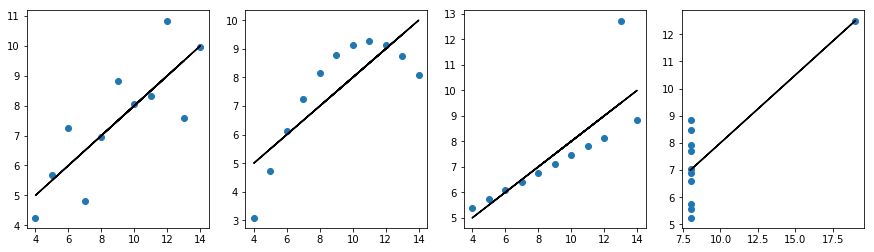

In [3]:
%matplotlib inline
import pylab as plt
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].scatter(x,y1)
axes[0].plot(x, yhat, ls='-', color='k')
axes[1].scatter(x,y2)
axes[1].plot(x, yhat, ls='-', color='k')
axes[2].scatter(x,y3)
axes[2].plot(x, yhat, ls='-', color='k')
axes[3].scatter(x4,y4)
axes[3].plot(x4, m*x4 + b, ls='-', color='k')

Parity plots:

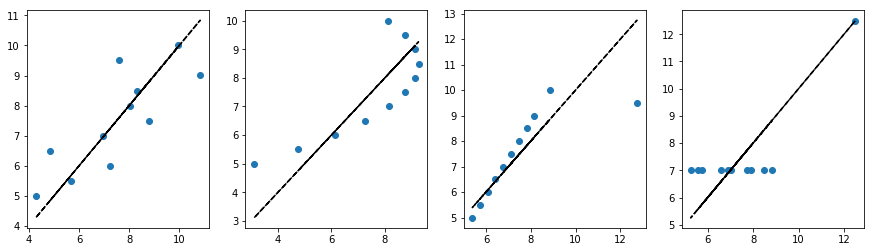

In [4]:
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].scatter(y1, yhat)
axes[0].plot(y1, y1, ls='--', color='k')
axes[1].scatter(y2, yhat)
axes[1].plot(y2, y2, ls='--', color='k')
axes[2].scatter(y3, yhat)
axes[2].plot(y3, y3, ls='--', color='k')
axes[3].scatter(y4, m*x4 + b)
axes[3].plot(y4, y4, ls='--', color='k')

We can also visualize the error distributions:

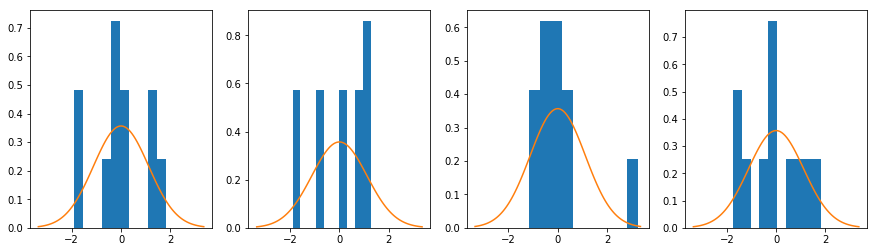

In [5]:
from scipy.stats import norm

fig, axes = plt.subplots(1,4,figsize=(15,4))
axes[0].hist(y1 - yhat,density=1)
axes[1].hist(y2 - yhat,density=1)
axes[2].hist(y3 - yhat,density=1)
axes[3].hist(y4 - (m*x4 + b),density=1)

mu = 0
sigma = np.std(y1 - yhat)
x_resid = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

for ax in axes:
    ax.plot(x_resid,norm.pdf(x_resid, mu, sigma))

### Question: Based on these sets of plots, which dataset is best described by linear regression?

## Adding features to improve performance

One strategy to improve regression models is to give them more information in the form of independent variables, or "features". Even without changing the underlying model, this can lead to considerable improvements in accuracy. We will consider two strategies in improving the features of regression models:

* Generating non-linear responses from "linear" models by creating *derived* features

* Adding new information about samples and analyzing the property of these independent variables

## Creating non-linear derived features for least-squared regression

We have already seen a classic example of this in previous lectures where we considered polynomial regression:

$y_j = b + m*x_j + p*x_j^2 + ...$

$y_j = \beta_0 + \beta_1 x_j + \beta_2 x_j^2 + \beta_3 x_j^3 + \beta_4 x_j^4 + ...$

$y_j = \sum_i^N \beta_i x_j^i$

We can think of this as "deriving" non-linear polynomial features from $x$, then using these new features in a linear least-squares regression model.

$x_j^{(k)} = x_j^k$

$y_j = \sum_k^N \beta_k x_j^{(k)} = \sum_k^N \beta_k x_{jk} \Rightarrow \vec{y} = \underline{\underline{X}}\vec{\beta}$

However, there is no reason that we have to use polynomials. To demonstrate this we will use the following three example datasets:

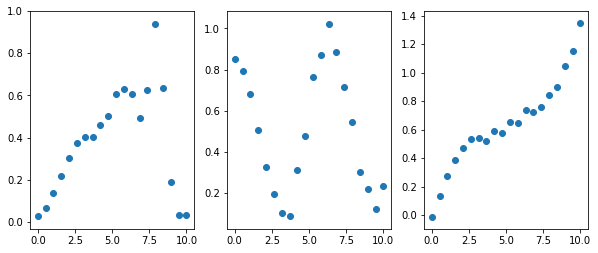

In [6]:
import pandas as pd

df = pd.read_csv('datasets/three_regression_examples.csv')
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(df['0'], df['1'])
axes[1].scatter(df['0'], df['2'])
axes[2].scatter(df['0'], df['3'])

x = df['0'].values
y1 = df['1'].values
y2 = df['2'].values
y3 = df['3'].values

To start with, we will consider two types of "derived features":

* polynomials
* Gaussian distributions

We have already seen the "polynomial features" in a prior lecture:

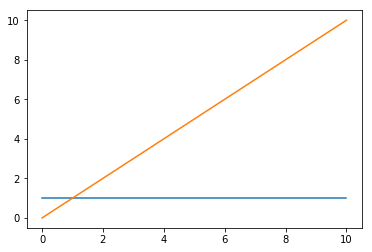

In [7]:
def polynomial_features(x, N):
    # function to return a matrix of polynomials for x to order N
    # One-liner uses "list comprehension" to iterate through range 0 - N (note N+1 since range function is not inclusive)
    # The input, x, is raised to the power of N for each value of N
    # The result is converted to an array and transposed so that columns correspond to features and rows correspond to data points (individual x values)
    return np.array([x**k for k in range(0,N)]).T

X_poly = polynomial_features(x,2)
fig,ax = plt.subplots()
for col in range(X_poly.shape[1]):
    ax.plot(x,X_poly[:,col])

Another alternative is to expand the function in terms of Gaussian (normal) distributions with evenly-spaced means and a fixed standard deviation:

$x^{(k)} = \exp{\left(-\frac{(x-x_k)^2}{2\sigma^2}\right)}$

where $x_k$ are the means and $\sigma$ is the standard deviation.

In [8]:
def gaussian_features(x, N , sigma = 1):
    # x is a vector
    # sigma is the standard deviation
    xk_vec = np.linspace(min(x), max(x), N)
    features = []
    for xk in xk_vec:
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

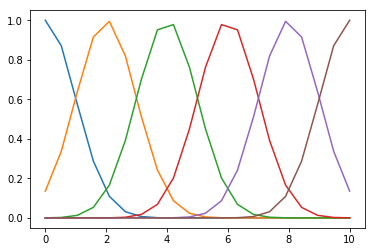

In [9]:
X_gauss = gaussian_features(x,6)
fig,ax = plt.subplots()
for col in range(X_gauss.shape[1]):
    ax.plot(x,X_gauss[:,col])

Now we have several strategies for creating non-linear derived features from the input. Let's see how they work on the example datasets. We will use our linear regression functions from last lecture. You should know how to derive these!

In [10]:
from  scipy.linalg  import solve
def multilinear_regression(X,y):
    ## Derive expression
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    beta = solve(A,b)
    return beta

def multilinear_prediction(X,beta):
    return np.dot(X, beta)

/Users/Lecturing/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2700505765482233e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


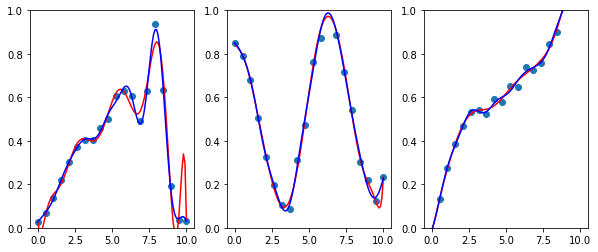

In [11]:
N = 15 #<- Number of features

# Generate features
X_poly = polynomial_features(x,N)
X_gauss = gaussian_features(x,N)

#plot the original data
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)
axes[2].scatter(x, y3)

# Iterate through feature options
X_features = [X_poly, X_gauss]
feature_functions = [polynomial_features,  gaussian_features]
colors = ['r','b']

x_dense = np.linspace(min(x),max(x),100)

for yi, ax in zip([y1, y2, y3], axes):
    for X, f_features, color in zip(X_features,feature_functions,colors):#<- useful way to iterate through synced lists
        beta = multilinear_regression(X, yi)
        X_dense = f_features(x_dense,N)
        yhat = multilinear_prediction(X_dense,beta)
        ax.plot(x_dense, yhat, color=color, ls='-')
    ax.set_ylim([0,1])

### Question: Does N > 10 provide a reliable model? Why?

## Colinearity of features

Let's take a closer look at the properties of the features that we generated by investigating their covariance. We can get an intuitive feel for this by plotting them against each other:

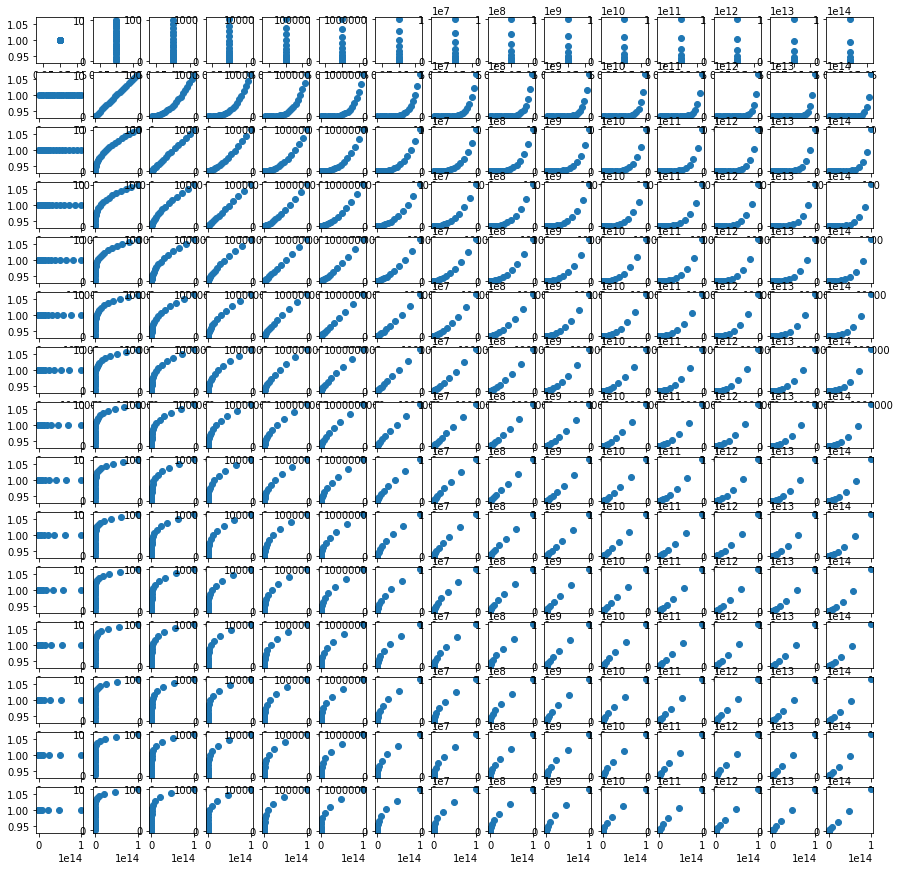

In [12]:
fig, axes = plt.subplots(N,N, figsize = (15,15))
X = X_poly

for i in range(N):
    for j in range(N):
        xi = X[:,i]
        xj = X[:,j]
        axes[i,j].scatter(xi, xj)


We can get a clearer picture by looking at the covariance matrix:

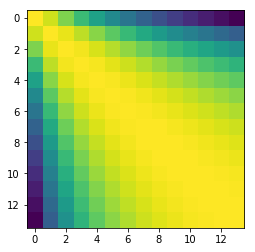

In [13]:
X_scaled = (X[1:,1:] - X[1:,1:].mean(axis=0))/X[1:,1:].std(axis=0)
covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
ax.imshow(covar)

The polynomial features are highly correlated. This causes numerical issues for multi-linear regression since the system of equations becomes nearly redundant. This is the linear algebra equivalent of (almost) dividing by zero. Let's take a look at the coefficient values:

/Users/Lecturing/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2700505765482233e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


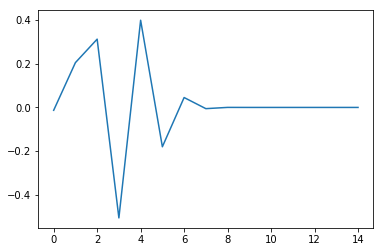

In [14]:
fig,ax = plt.subplots()
beta = multilinear_regression(X, y3)
ax.plot(range(0,N),beta)

We will look at two basic strategies for "stabilizing" the model:

1) Ortogonalization of feature vectors

2) Regularization of coefficients through the loss function

### Orthogonalizing coefficients

Now we know that co-linear features cause unpredictable behavior in the model, so one strategy is to ensure that features are not co-linear. For derived features, we can enforce this when we create the feature set. A classic example is "Legendre Polynomials" which are an orthogonal polynomial basis set:

$L_n(x) = \frac{1}{2^n n!}\frac{\mathrm{d}^n}{\mathrm{d}x^n}(x^2 - 1)^n $

$L_0(x) = 1$

$L_1(x) = x$

$L_2(x) = \frac{1}{2} (3x^2 -1)$

$L_3(x) = \frac{1}{2} (5x^3 - 3x)$

...

Luckily these are implemented in `numpy`.

In [15]:
from numpy.polynomial.legendre import legval

def legendre_features(x, N):
    features = []
    for k in range(1,N+1):
        alphas = np.zeros(k)
        alphas[-1] = 1 #<- this gives us the kth legendre polynomial (see docs for legval)
        x_normed = (x - min(x))/(max(x) - min(x))
        x_normed = x_normed*2 - 1
        features.append(legval(x_normed, alphas))
    return np.array(features).T

We can compare the Legendre polynomials with regular polynomials:

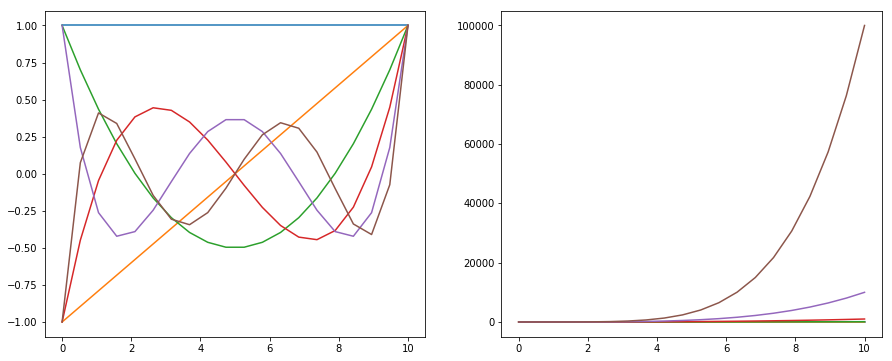

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
N = 6
X_poly = polynomial_features(x,N)
X_leg = legendre_features(x,N)

for col in range(X_leg.shape[1]):
    axes[0].plot(x,X_leg[:,col])

for col in range(X_poly.shape[1]):
    axes[1].plot(x,X_poly[:,col])

We can verify that they are orthogonal by checking the covariance:

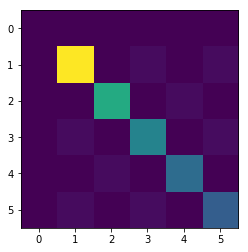

In [17]:
x_dense = np.linspace(min(x),max(x),100) #<- note that they will not be exactly orthogonal due to numerical issues, but as X gets more dense they become more orthogonal.
X_leg = legendre_features(x_dense,N)
cov_leg = np.cov(X_leg.T)

fig,ax = plt.subplots()
ax.imshow(cov_leg)

Generating orthogonal features is an elegant solution, but it isn't always practical. It is not always obvious how to determine the form of an orthogonal basis, and more importantly not all features are derived. Often features are "observed", not derived, so it is impossible to ensure that they are orthogonal.

Fortunately, we have a solution. Remember that principal component analysis (PCA) gives us orthonormal eigenvectors of the covariance matrix. These eigenvectors can be used as features!

We can use PCA to create a set of orthogonal features from our Gaussian kernel basis set. We just need to remember that the principal component vectors are **eigenvectors of the covariance matrix**.

(15, 15)


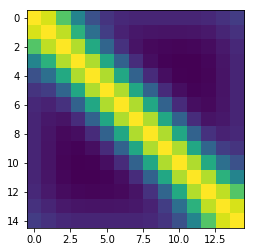

In [18]:
X_scaled = (X_gauss - X_gauss.mean(axis=0))/X_gauss.std(axis=0)
covar = np.cov(X_scaled.T)
eigvals, eigvecs = np.linalg.eig(covar)
print(eigvecs.shape)
fig,ax = plt.subplots()
ax.imshow(covar)

Now we can project the original feature space onto the eigenvector space using a dot product:

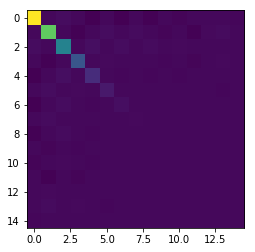

In [19]:
X_gauss_PCA = np.dot(X_gauss, eigvecs)
covar = np.cov(X_gauss_PCA.T)
fig,ax = plt.subplots()
ax.imshow(covar)

Now our features are not only orthogonal, but they are also ordered by the amount of variance they explain. This provides a very convenient way to generate features for regression models. We can create a `PCA_features` function to do this for any given set of features:

In [20]:
def PCA_features(X):
    X_scaled = (X - X.mean(axis=0))/X.std(axis=0)
    covar = np.cov(X_scaled.T)
    eigvals, eigvecs = np.linalg.eig(covar)
    return np.dot(X, eigvecs)

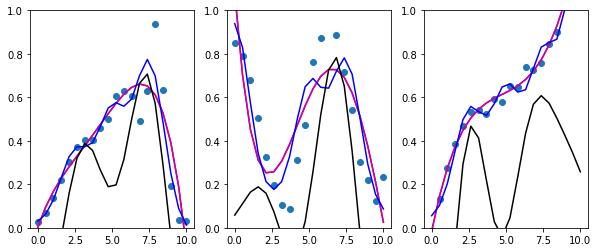

In [21]:
N = 5 #<- Number of features

# Generate features
X_poly = polynomial_features(x,N)
X_leg = legendre_features(x,N)
X_gauss = gaussian_features(x,N)

X_gauss_full = gaussian_features(x,len(x)) #<- first create a lot of Gaussians
X_gauss_PCA = PCA_features(X_gauss_full)[:,:N] #<- select the first N principal components


#plot the original data
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)
axes[2].scatter(x, y3)

# Iterate through feature options
X_features = [X_poly, X_leg, X_gauss, X_gauss_PCA]
colors = ['r','m','b','k']

x_dense = np.linspace(min(x),max(x),100)

for yi, ax in zip([y1, y2, y3], axes):
    for X,  color in zip(X_features,colors):#<- useful way to iterate through synced lists
        beta = multilinear_regression(X, yi)
        yhat = multilinear_prediction(X,beta)
        ax.plot(x, yhat, color=color, ls='-')
    ax.set_ylim([0,1])

As the number of features approaches the number of data points all models converge; however, the behavior at low N varies considerably.

### Question: Which of these choices of features is the *worst*? 

## Principal Component Regression and Partial Least Squares

Ultimately we want to not only numerically stabilize regression models, but also identify the simplest possible model (e.g. fewest number of features or parameters). We will explore two techniques for doing this:

* Principal component regression (PCR) - determine principal component(s) that give the best fit.

* Partial least squares (PLS) - determine the linear combinations of principal components that maximize covariance between inputs and outputs.

We will look at a real data set of sensor data as an example.

The example [data set](https://archive.ics.uci.edu/ml/datasets/Air+Quality) consists of the raw output of metal oxide sensors for air pollutants in an Italian city. These metal oxide sensors are much cheaper than the standard sensors, but they are less accurate. The data set also includes measured concentrations from a calibrated sensor. The calibrated sensor will serve as the *ground truth*, and the goal is to determine the pollutant concentration based on the output of the metal oxide sensors. The units are mg/m$^3$ (CO), $\mu$g/m$^3$ (hydrocarbons, NO2), and ppb (NOx).

S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, [On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario](https://www.sciencedirect.com/science/article/pii/S0925400507007691?via%3Dihub), Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005,

In [22]:
df = pd.read_excel('datasets/pollution_sensors.xlsx')
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


Let's rename the columns to make life a little easier:

In [23]:
naming_dict = {'CO(GT)':'true_CO', 
               'PT08.S1(CO)':'SnOx_CO', 
               'NMHC(GT)':'true_hydrocarbon', 
               'C6H6(GT)':'true_benzene',
               'PT08.S2(NMHC)':'TiOx_hydrocarbon',
               'NOx(GT)':'true_NOx',
               'PT08.S3(NOx)':'WOx_NOx',
               'NO2(GT)':'true_NO2',
               'PT08.S4(NO2)':'WOx_NO2',
               'PT08.S5(O3)':'InOx_O3',
               'RH':'relative_humidity',
               'AH':'absolute_humidity'
              }
df = df.rename(columns=naming_dict)
df.head(5)

,Date,Time,true_CO,SnOx_CO,true_hydrocarbon,true_benzene,TiOx_hydrocarbon,true_NOx,WOx_NOx,true_NO2,WOx_NO2,InOx_O3,T,relative_humidity,absolute_humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


Let's try to build a model to predict CO concentration. The simplest assumption is that CO concentration is correlated with the CO-targeted tin oxide (SnOx) sensor:

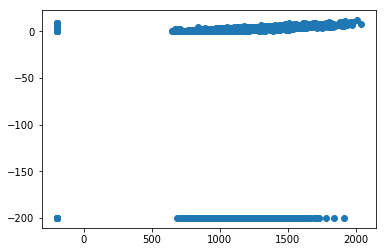

In [24]:
x = df['SnOx_CO'].values
y = df['true_CO'].values
fig, ax = plt.subplots()
ax.scatter(x,y)

We can see that there are some weird -200 values here. If you read the dataset description this is the default value for no data, so let's throw these datapoints out:

There are 7344 valid points


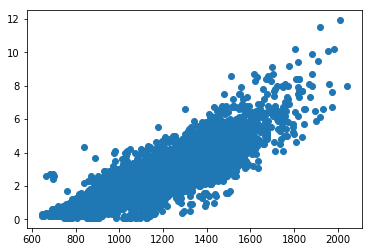

In [25]:
valids = np.logical_and(y>0, x>0)
x = x[valids]
y = y[valids]
print('There are {} valid points'.format(len(x)))
fig, ax = plt.subplots()
ax.scatter(x,y)

In this case the tin oxide (SnOx) sensor is a "feature" and the true CO concentration is the output. We can use this to create a baseline linear regression model. This time around we will do it with `scikit-learn` instead of our own functions:

R^2 0.77315382513
MAE 0.490342911782


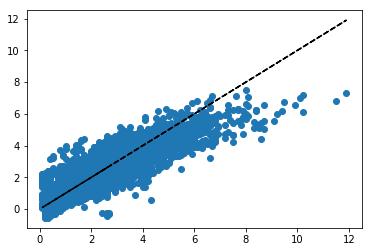

In [26]:
x = x.reshape(x.size,1)
intercept = np.ones((x.size,1))
X = np.append(intercept,x,1)
y = y.reshape(y.size,1)
beta = multilinear_regression(X, y)
yhat = multilinear_prediction(X,beta)
fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat)
ax.plot(y,y,ls='--',color='k')

# print R^2
ybar = np.mean(y)
SST = np.sum((y-ybar)**2)
SSE = np.sum((y-yhat)**2)
print('R^2',(SST - SSE) / SST)
# print MAE
print('MAE',np.mean(np.abs(y-yhat)))

### Question: What other features can we use?

In [27]:
df.head(5)

,Date,Time,true_CO,SnOx_CO,true_hydrocarbon,true_benzene,TiOx_hydrocarbon,true_NOx,WOx_NOx,true_NO2,WOx_NO2,InOx_O3,T,relative_humidity,absolute_humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [28]:
names =['SnOx_CO', 'TiOx_hydrocarbon', 'WOx_NOx', 'WOx_NO2','InOx_O3', 'T', 'relative_humidity'] 
X = df[names]
y = df['true_CO']
X = X.values
y = y.values
valid_X = (X > 0).min(axis=1) #<- if any are false, this will be false
valids = np.logical_and(valid_X, y > 0)
valids = np.logical_and(valids, np.isfinite(X).all(axis=1)) #<- this removes inf and nan
X = X[valids, :]
y = y[valids]
intercept = np.ones((X.shape[0],1))
X = np.append(intercept, X, 1)
X_full = X.copy() #<- we will use X_full later when we want the original dataset



We can see how well a linear model works with all features:

0.886540217614
0.323766924553


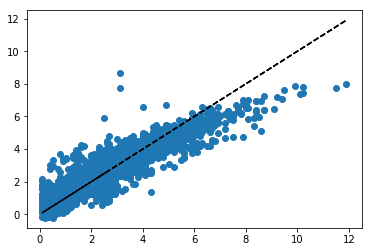

In [29]:
beta = multilinear_regression(X, y)
yhat = multilinear_prediction(X,beta)
fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat)
ax.plot(y,y,ls='--',color='k')


# print R^2
ybar = np.mean(y)
SST = np.sum((y-ybar)**2)
SSE = np.sum((y-yhat)**2)
print((SST - SSE) / SST)
# print MAE
print(np.mean(np.abs(y-yhat)))

The accuracy is improved, but do we really need all the features? We can check the covariance structure:

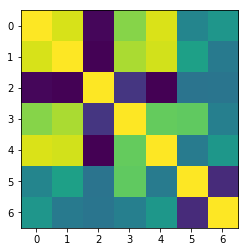

In [30]:
X_scaled = (X[1:,1:] - X[1:,1:].mean(axis=0))/X[1:,1:].std(axis=0)
covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
ax.imshow(covar)

Clearly there are some co-linear features here. We can use PCA to form orthogonal feature sets. This time we will use `scikit-learn` instead of our own function:

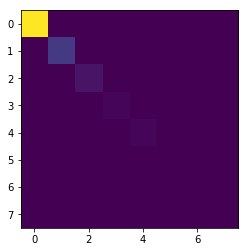

In [31]:
from sklearn.decomposition import PCA

PC_model = PCA(n_components=X.shape[1])
PC_model.fit(X)
X_PCA = PC_model.transform(X)

covar = np.cov(X_PCA.T)
fig,ax = plt.subplots()
ax.imshow(covar)

Now we can construct a linear regression model with the first `N` principal component features. We will use the `scikit-learn` linear model instead of our own:

R^2 0.886540217614
MAE 0.323766924553


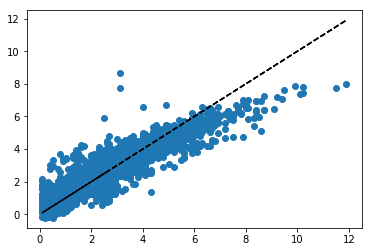

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
N = 8

X = X_PCA[:,:N]

lr.fit(X,y)
yhat = lr.predict(X)
fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat)
ax.plot(y,y,ls='--',color='k')

# print R^2
print('R^2', lr.score(X,y))
# print MAE
print('MAE', np.mean(np.abs(y-yhat)))

### Question: Which principal component improves the model the most?

The PCA decomposition maximizes **variance within the feature space** along each orthogonal vector. However, what we really want is to maximize the **covariance between the features and the output**. This can be achieved with partial least squares, or PLS.

We won't go into the math of PLS, but conceptually it is a **supervised** alternative to PCA.

/Users/Lecturing/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:313: UserWarning: X scores are null at iteration 7
  warnings.warn('X scores are null at iteration %s' % k)


0.886540217614
0.323766924553


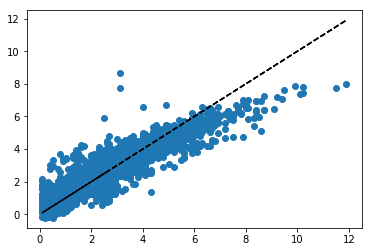

In [33]:
from sklearn.cross_decomposition import PLSRegression

N = 8
PLS = PLSRegression(n_components = N, tol=1e-8) #<- N_components tells the model how many sub-components to select
PLS.fit(X_full,y) #<- we have to pass y into the fit function now
yhat_PLS = PLS.predict(X_full)[:,0] #<- the prediction here is a column vector

fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat_PLS)
ax.plot(y,y,ls='--',color='k')

# print R^2
print(PLS.score(X_full,y))

# print MAE
print(np.mean(np.abs(y-yhat_PLS)))

### Question: How many components are needed to achieve an $R^2$ similar to the model that contains all features?

For a given number of components, the $R^2$ value of PLS will always be greater than PCA regression. For this reason PLS is typically preferred to PCA regression.

Note that the MAE is not always lower. Again, this highlights the importance of making a good choice for the accuracy metric when assessing a model.

## Regularization of Coefficients

All of the models we have seen so far are **parametric** - the number of parameters in the model does not depend on the number of data points. Parametric models are relatively straightforward to simplify by reducing the number of derived or observed features through linear combinations.

Another possibility is to use features that are derived from the data points themselves. We will consider two possibilities:

* Piecewise polynomials (or splines)
* Gaussian kernels

These are **non-parametric** models, and are much more susceptible to over-fitting. Simplifying them by removing feature terms is also not so intuitive, since it is equivalent to dropping specific data points. This is typically overcome by **regularizing** the coefficients of the model by including them in the loss function.

We will return to our original example datasets to illsutrate this.

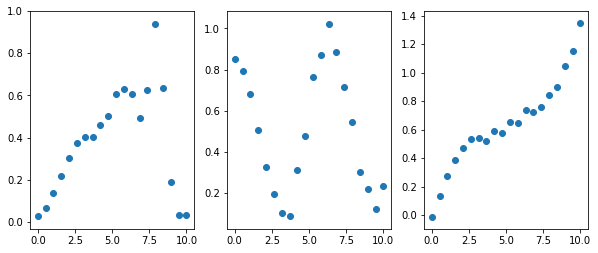

In [34]:
df = pd.read_csv('datasets/three_regression_examples.csv')
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(df['0'], df['1'])
axes[1].scatter(df['0'], df['2'])
axes[2].scatter(df['0'], df['3'])

x = df['0'].values
y1 = df['1'].values
y2 = df['2'].values
y3 = df['3'].values

## Piecewise polynomials

Consider "features" of the form:

$x^{(k)} = max(0, x-x_k)^n$

where $x_k$ are the input data points and $n$ is the order of the polynomial.

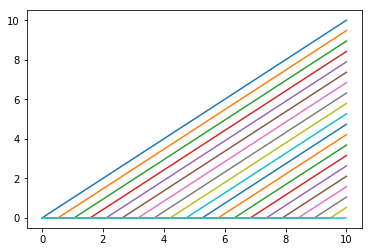

In [35]:
def piecewise_polynomial_kernel(x, order, x_dense=None):
    if x_dense is None:
        x_dense = x #<- we will want to project this basis on to a finer grid sometimes.
    features = []
    for xi in x:
        features.append(np.array([max(0,xj-xi)**order for xj in x_dense]))
    return np.array(features).T

X_pieces = piecewise_polynomial_kernel(x,1)
fig,ax = plt.subplots()
for col in range(X_pieces.shape[1]):
    ax.plot(x,X_pieces[:,col])

Another possibility is to use Gaussian kernels centered at each data point:

$x^{(k)} = \exp{\left(-\frac{(x-x_k)^2}{2\sigma^2}\right)}$

Note that if $k=N$ and the data points are evenly spaced then this is equivalent to the Gaussian features from before.

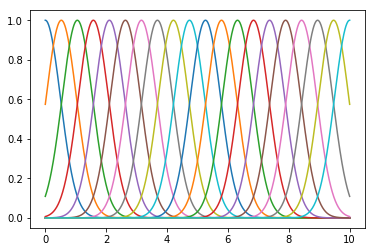

In [36]:
def gaussian_kernel(x, sigma = 1, x_dense=None):
    # x is a vector
    # sigma is the standard deviation
    if x_dense is None:
        x_dense = x #<- we will want to project this basis on to a finer grid sometimes.
    features = []
    for xk in x: #<- compare this to the function for parametric Gaussian basis
        features.append(np.exp(-((x_dense - xk)**2/(2*sigma**2))))
    return np.array(features).T

x_dense = np.linspace(min(x),max(x),1000)
#x_dense = x
X_kernel = gaussian_kernel(x,0.5,x_dense)
fig,ax = plt.subplots()
for col in range(X_kernel.shape[1]):
    ax.plot(x_dense,X_kernel[:,col])

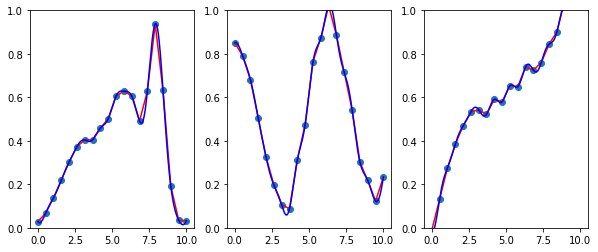

In [37]:
from sklearn.linear_model import Ridge


#plot the original data
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)
axes[2].scatter(x, y3)

# Generate features
N_poly = 1
X_poly = piecewise_polynomial_kernel(x,N_poly)
sigma = 0.5
X_gauss = gaussian_kernel(x,sigma)

# Iterate through feature options
X_features = [X_poly, X_gauss]

# Create "dense" versions for predictions
x_dense = np.linspace(min(x),max(x),1000)
dense_features = [piecewise_polynomial_kernel(x, N_poly, x_dense), gaussian_kernel(x, sigma, x_dense)]
feature_functions = [piecewise_polynomial_kernel,  gaussian_kernel]

colors = ['r','b']


lr = LinearRegression()

for yi, ax in zip([y1, y2, y3], axes):
    for X, X_dense, color in zip(X_features,dense_features,colors):#<- useful way to iterate through synced lists
        lr.fit(X, yi)
        yhat = lr.predict(X_dense)
        ax.plot(x_dense, yhat, color=color, ls='-')
    ax.set_ylim([0,1])

These "kernel" functions are very good at interpolating, but terrible at extrapolating.

### Question: What happens if `N_poly` is increased or `sigma` is decreased?

The coefficient values for these non-parametric models can also span a huge range, especially if the model is substantially over-fitted:

(array([  1.,   1.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -1.90668911e+09,  -1.00443414e+09,  -1.02179162e+08,
          8.00075812e+08,   1.70233079e+09,   2.60458576e+09,
          3.50684073e+09,   4.40909571e+09,   5.31135068e+09,
          6.21360566e+09,   7.11586063e+09]),
 <a list of 10 Patch objects>)

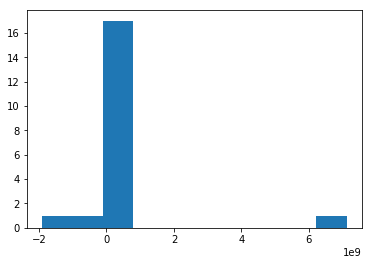

In [38]:
X_poly = piecewise_polynomial_kernel(x,3)
lr.fit(X_poly,y1)
fig, ax = plt.subplots()
ax.hist(lr.coef_)

We can also see that the features are highly correlated:

/Users/Lecturing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


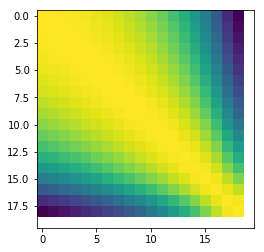

In [39]:
X_scaled = (X_poly - X_poly.mean(axis=0))/X_poly.std(axis=0)
covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
ax.imshow(covar)

It turns out that the magnitude of the parameters corresponds to the "smoothness" of the function. We can see this if we take the derivative of the basis functions, or empirically by playing with the parameters above.

This is the basis of **regularization** as a route to control co-linearity and model complexity.

Recall that least-square regression uses the sum of squared errors as the objective function:

$min(\sum_i \epsilon_i^2)$ with respect to parameters $\beta$. This is achieved by setting the derivative equal to zero:

$\frac{\sum_i \epsilon_i^2}{\partial \vec{\beta}}=0$

In a **regularized linear model** we include a **penalty** term on the magnitude of the coefficients in the loss function:

$min(\sum_i \epsilon_i^2 + \lambda || \vec{\beta} ||)$

where $\lambda$ is a regularization strength hyperparameter, $||.||$ is a "norm". The most common types of regularization are **ridge regression** which uses an $L_2$ norm ($\sqrt{\sum_i \beta_i^2}$), **LASSO regression** which uses an $L_1$ norm ($\sum_i | \beta_i |$), and **elastic net** regression which uses a combination.

We will revisit these in more detail, but for now you can remember the following:

* Ridge regression: mininizes the magnitude of the coefficients, but not the number of coefficients. It is very stable, but does not reduce the number of features needed.

* LASSO regression: minimizes both magnitude and number of coefficients. However, it can be unstable if features are very co-linear.

* Elastic net regression: provides a flexible tradeoff between ridge and LASSO, but uses an additional hyperparameter.

## Kernel ridge regression (KRR)

Kernel ridge regression is one of the most common regression models in machine learning. It is a **non-parametric** model that uses a "kernel" (typically Gaussian) at each training data point, and uses **regularization** through ridge regression to control the complexity of the model.

We have already seen Gaussian kernels, and will combine this with ridge regression from `scikit-learn` to implement the model.

We will not derive the equations for KRR, but **you should be able to derive them following the same procedure that was used for least-squares**.

We will focus on a single dataset to illustrate the technique, and in order to test the model we will need to use **cross validation**:

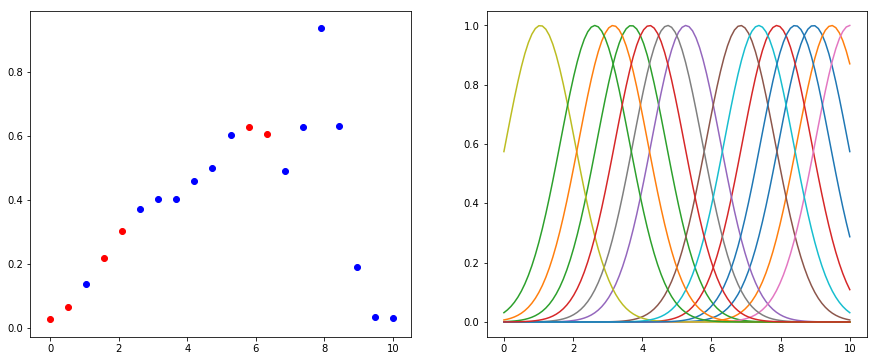

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.3)

sigma = 1

axes[0].scatter(x_train,y_train,color='b')
axes[0].scatter(x_test,y_test,color='r')

x_dense = np.linspace(min(x),max(x),100)
X_kernel_dense = gaussian_kernel(x_train,sigma,x_dense) #<- Only TRAINING POINTS are included in the feature set!

for col in range(X_kernel_dense.shape[1]):
    axes[1].plot(x_dense,X_kernel_dense[:,col])

MAE 0.137338484935


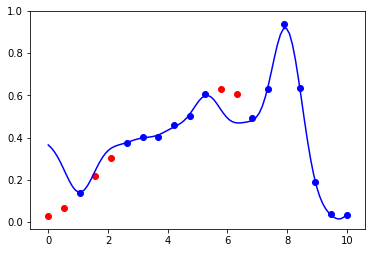

In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.01) #<- the regularization strength is called "alpha" in scikit-learn (instead of lambda)
sigma = 0.5

fig, ax = plt.subplots()

X_kernel =  gaussian_kernel(x_train,sigma)
X_kernel_test = gaussian_kernel(x_train, sigma, x_test) #<- make sure you understand why x_test used as x_dense instead of x?
X_kernel_dense = gaussian_kernel(x_train,sigma,x_dense)

ridge.fit(X_kernel, y_train)
yhat = ridge.predict(X_kernel_dense)
y_predict = ridge.predict(X_kernel_test)

ax.plot(x_dense, yhat, color=color, ls='-')

ax.scatter(x_train,y_train,color='b')
ax.scatter(x_test,y_test,color='r')

prediction_error = np.mean(np.abs(y_test - y_predict))
print('MAE',prediction_error)

### Question: How many hyper-parameters are in this model?


We can use cross-validation to optimize the hyperparameters, but it will be a lot easier if we just use the `scikit-learn` KRR implementation:

[0, 1, 1.0, 0.021225017997714618]
best_alpha 0


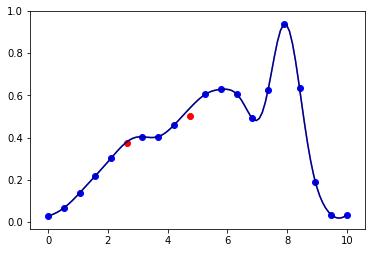

In [68]:
from sklearn.kernel_ridge import KernelRidge

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.1)

min_error = 1e99

for alpha in [0, 0.01, 0.1, 0.5, 1, 10]:
    #for sigma in [0.05, 0.25, 0.5, 0.75, 1, 2, 4]:
        gamma = 1./sigma #<- scikit learn uses the inverse of sigma
        KRR = KernelRidge(alpha=alpha, gamma=gamma, kernel='rbf') #<- the "rbf" kernel is the same as a Gaussian kernel
        X = x_train.reshape(x_train.size,1) #<- must be a column vector
        KRR.fit(X,y_train)
        X_test = x_test.reshape(x_test.size,1)
        ypredict = KRR.predict(X_test)
        prediction_error = np.mean(np.abs(y_test - ypredict))
        if prediction_error < min_error:
            best = [alpha, sigma, gamma, prediction_error]
            min_error = prediction_error

print(best)
alpha, sigma, gamma,  err = best
print('best_alpha', alpha)
fig, ax = plt.subplots()
KRR = KernelRidge(alpha=alpha, gamma=gamma, kernel='rbf')
LR = KernelRidge(alpha=0,gamma=gamma, kernel='rbf') #<- compare regularized to non-regularized

X = x_train.reshape(x_train.size,1) #<- must be a column vector
KRR.fit(X,y_train)
LR.fit(X,y_train)

X_test = x_test.reshape(x_test.size,1)
ypredict = KRR.predict(X_test)


yhat = KRR.predict(x_dense.reshape(x_dense.size,1))
ynoreg = LR.predict(x_dense.reshape(x_dense.size,1))

ax.plot(x_dense, yhat, color='b', ls='-')
ax.plot(x_dense, ynoreg, color='k', ls='-', alpha=0.5)

ax.scatter(x_train,y_train,color='b')
ax.scatter(x_test,y_test,color='r')

Run the block above a few times and see what happens. When does regularization help? When is it unnecessary?

## Other approaches to regression

The approach of generating non-linear features and fitting a linear model is extremely powerful, and forms the basis of many approaches to regression. However, there are also a number of other approaches that involve non-linear (non-convex) optimization including neural networks, and techniques that use discrete data representations such as kNN and decision tree regression. This lecture briefly provides demonstrations of a few approaches, though the technical details will not be covered.

### Non-linear regression

Non-linear regression involves optimizing an objective function using an iterative optimization algorithm rather than the direct solution that is obtained from the "linear" (convex) models. Non-linear models can take two forms:

* Pre-defined models with fixed form
    - Example: fitting standard deviation of Gaussians

* Flexible models with varying complexity
    - Example: neural networks

The pre-defined models are common in the case where the behavior of a function is known, but its parameters must be determined, while flexible models are "black boxes" that can represent the behavior of any function if enough terms are added.

We will start by revisiting the case of fitting a combination of Gaussians, although here we will fit the mean and standard deviation in addition to the coefficient.

If we look at dataset 1 we can see that it looks like it may be well-represented by 3 Gaussian peaks. We can guess the positions and standard deviations, but they won't be perfect:

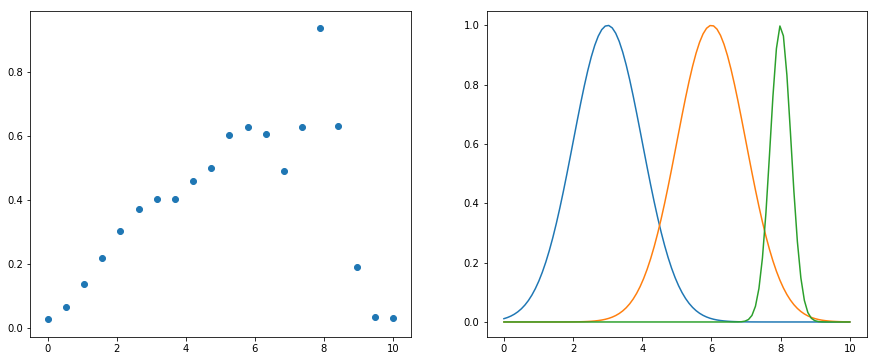

In [61]:
fig, axes = plt.subplots(1,2,figsize=(15,6))

axes[0].scatter(x,y1)

def arb_gaussian_features(x, mu_sigma_list):
    # x is a vector
    # sigma_mu_list is a list of [(mu1, sigma1), (mu2, sigma2), ...]
    features = []
    for mu,sigma in mu_sigma_list:
        features.append(np.exp(-((x - mu)**2/(2*sigma**2))))
    return np.array(features).T

guesses = [(3,1),(6,1),(8,0.3)]

x_dense = np.linspace(min(x),max(x),100)
X_dense = arb_gaussian_features(x_dense, guesses)

for col in range(X_dense.shape[1]):
    axes[1].plot(x_dense,X_dense[:,col])

We can use linear regression to see how well this feature set performs:

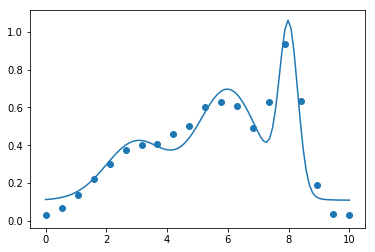

In [62]:
X = arb_gaussian_features(x, guesses)

lr = LinearRegression()
lr.fit(X,y1)
yhat = lr.predict(X_dense)
fig, ax = plt.subplots()
ax.scatter(x,y1)
ax.plot(x_dense, yhat)

This doesn't look so good. We can improve things by playing with the guesses from above, but this isn't very efficient. A better approach is to optimize the means and standard deviations. This is an example of **non-linear regression** with a fixed functional form (sum of 3 Gaussians).

We can use `scipy.optimize.minimize` to achieve this, but we need to set up an **objective function** to minimize, and re-structure our functions so that they work with the syntax of `minimize`.

We will use least-squares non-linear regression:

In [64]:
def objective(beta_mu_sigma_list, x=x, y=y1):
    # beta_mu_sigma_list is a long list of [beta0, mu0, sigma0, beta1, mu1, sigma1, ...]
    # the optional arguments x and y provide the real data
    
    #first we need to construct a mu_sigma list to pass to the `arb_gaussian_features` function:
    beta = beta_mu_sigma_list[::3]
    mus = beta_mu_sigma_list[1::3] #<- use the "stride" functionality to do this efficiently!
    sigmas = beta_mu_sigma_list[2::3]
    mu_sigma_list = list(zip(mus,sigmas)) #<- the "zip" function is very useful here! (note it must be converted to a list though)
    # print(mu_sigma_list) #<- uncomment to convince yourself it worked!
    
    #now we can use the "arb_gaussian_features" function to generate X

    X = arb_gaussian_features(x, mu_sigma_list)
    
    #now we can make a prediction using beta*X
    yhat = np.dot(X,beta)
    
    #now we will take the sum of squared errors:
    SSE = np.sum((y - yhat)**2)
    
    return SSE

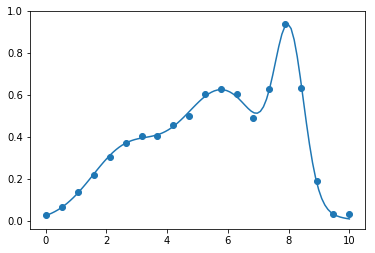

In [68]:
from scipy.optimize import minimize

#beta_mu_sigma_list = np.ones(9) #<- let's assume everything is 1
beta_mu_sigma_list = [1, 3, 1, 1, 6, 0.5, 1, 8, 0.3]

objective(beta_mu_sigma_list)

result = minimize(objective, beta_mu_sigma_list)

beta_mu_sigma_list = result.x
beta = beta_mu_sigma_list[::3]
mus = beta_mu_sigma_list[1::3] #<- use the "stride" functionality to do this efficiently!
sigmas = beta_mu_sigma_list[2::3]
mu_sigma_list = list(zip(mus,sigmas))

X_dense = arb_gaussian_features(x_dense, mu_sigma_list)
yhat = np.dot(X_dense,beta)

fig, ax = plt.subplots()

ax.scatter(x,y1)
ax.plot(x_dense, yhat)

### Question: Was the optimization successful? How can we improve the results?

Non-linear optimization with a fixed form is powerful if you have a good idea of the behavior of the function. However, there is no unique solution! The results you get will depend on the quality of your initial guesses.

### Neural networks

Neural networks are a field of research on their own, and are beyond the scope of the course. However, they are a type of flexibile non-linear regression model of the form:

$y(x) = \sigma(\sum_l W_l^{(1)} \sigma(\sum_k W_k^{(0)}x + b^{0}) + b^{(1)})$

The function $\sigma$ is the "activation function", the parameters $W_k^{(n)}$ are the "weights", and $b_k^{(n)}$ are "biases" for layer $n$. The inner layer is the "hidden layer", and the outer layer is the "output layer". Adding more hidden layers corresponds to nesting more functions.

These networks are often represented as diagrams, since this formula is complex.

<img src="images/ANN.png" width="300">

One major challenge with neural networks is that they have a lot of hyperparameters:

* activation function type ($\sigma$)
    - relu (renormalized linear unit)
    - tanh
    - sigmoid: ($1/(1+exp(-x)$)
    - swish: ($x/(1+exp(-\beta x))$)
    
* number of hidden layers

* number of nodes

Neural networks are also non-linear, so the solution will ultimately depend on the initial guesses for the "weights", $W$. Getting good initial guesses and optimizing all of these hyperparameters without over-fitting the model represents a major challenge. However, neural networks are powerful because of the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) that proves that with enough nodes (even with a single hidden layer) a neural network can represent any function!

### kNN regression

Another strategy for regression is to convert "discrete" models that are typically used for classification into regression models. An example of this is k-nearest neighbors regression. The algorithm is identical to kNN for classification, except that instead of having neighbors "vote" on a class, neighboring values are averaged through some weighting scheme. We will not explore this in detail, but can quickly demonstrate it for our example dataset:

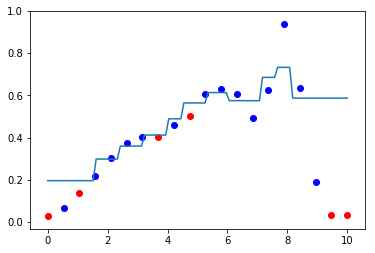

In [71]:
from sklearn.neighbors import KNeighborsRegressor

kNR = KNeighborsRegressor(n_neighbors=3, weights='uniform') #<- use a uniform averaging scheme

fig, ax = plt.subplots()

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.3) #<- remember that we have to split the data for kNN models!

ax.scatter(x_train,y_train,color='b')
ax.scatter(x_test,y_test,color='r')

x_dense = np.linspace(min(x),max(x),100)
kNR.fit(x_train.reshape(x_train.size,1), y_train.reshape(y_train.size,1))
y_predict = kNR.predict(x_dense.reshape(x_dense.size,1))

ax.plot(x_dense, y_predict)

## Quantifying uncertainty

There are almost always limits to how accurate a regression model (or any machine-learning model) can be. In engineering applications (and others) it is often important to understand and quantify the accuracy of these models to ensure that they are used to make safe and reliable decisions. Uncertainty quantification is a complex topic, but there are a few simple techniques that can help provide estimates.

**Note**: The uncertainty predicted by these models is not always rigorous. In practice you may need to think carefully about what error bars mean, and always be conservative with machine-learning models.

### Standard deviation of error

The simplest way of quantifying error is to rely on the normally-distributed, homoskedastic assumption of least-squares regression. In this case quantifying error is as simple as computing the standard deviation of the error distribution (accounting for the degrees of freedom, or number of parameters, in the regression model in the denominator to provide an unbiased estimate). 

Let's take Anscomb's quartet as an example:

In [72]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

m, b = np.polyfit(x,y1,deg=1) #<- it doesn't matter which dataset we choose since m, b, SSE, and R^2 are the same for all!
yhat = m*x + b
ybar = np.mean(y1)
error_stdev = np.std(y1 - yhat, ddof=2)
print(error_stdev)

1.23660332273


We can modify this as a function of `x` to account for the fact that the model is slightly better determined toward the middle of the range:

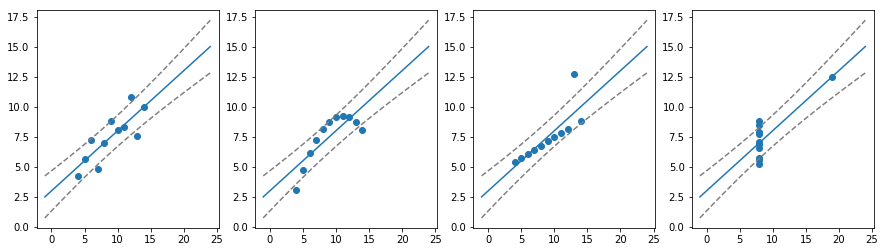

In [74]:
def regression_error(x,y, x_data, yhat):
    sigma_error = np.std(y-yhat, ddof=2)
    xbar = np.mean(x_data)
    y_error = sigma_error * np.sqrt(1 + 1/len(y) + ((x-xbar)**2)/(np.sum((x_data-xbar)**2)))
    return y_error

x_dense = np.linspace(min(x)-5,max(x4)+5,50)

y_error = regression_error(x_dense,y1, x, m*x+b)

fig, axes = plt.subplots(1,4,figsize=(15,4))

axes[0].scatter(x,y1)
axes[1].scatter(x,y2)
axes[2].scatter(x,y3)
axes[3].scatter(x4,y4)

for ax in axes:
    ax.plot(x_dense, m*x_dense+b)
    ax.plot(x_dense, m*x_dense+b + y_error, ls='--', color='0.5')
    ax.plot(x_dense, m*x_dense+b - y_error, ls='--', color='0.5')

We can see that there is some curvature to the error bars, but not much unless we go to extreme values of `x`.

### Ensembles from re-sampling

Another possibility that avoids the assumption of homoskedastic and normally-distributed errors is to use resampling techniques to generate a distribution of models. These models have distributions of parameters that capture the deviations in the data

There are many ways to achieve this, but one of the most popular is "bootstrapping". In a bootstrapping approach the data is re-sampled by choosing the same number of points `N` randomly from the real dataset, but this is done **with replacement** so that each re-sample is slightly different.

/Users/Lecturing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/Lecturing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/Lecturing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/Lecturing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/Lecturing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/Lecturing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarni

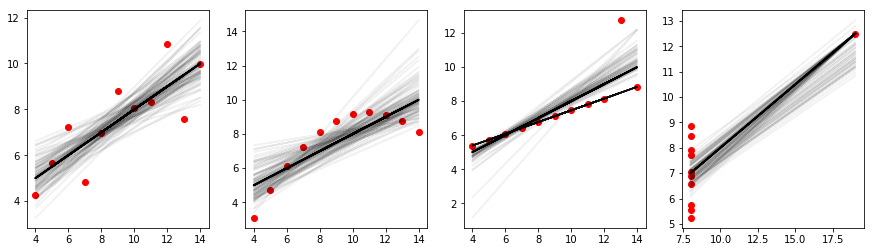

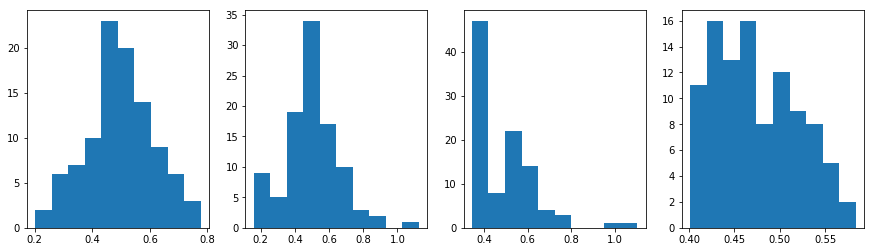

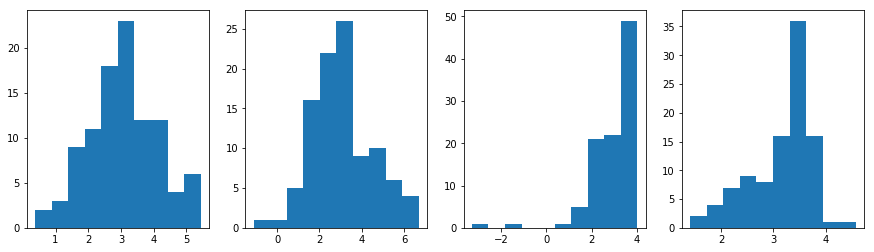

In [75]:
from numpy.random import choice #<- randomly select items from a list

def bootstrap_linregress(x_all,y_all,N):
    m_list = []
    b_list = []
    for n in range(N):
        subset = choice(range(len(x_all)),size=len(x_all),replace=True)
        xprime = [x_all[j] for j in subset]
        yprime = [y_all[j] for j in subset]
        m, b = np.polyfit(xprime,yprime,deg=1)
        m_list.append(m)
        b_list.append(b)
    return m_list, b_list

anscombs = [[x,y1],[x,y2],[x,y3],[x4,y4]]
fig, axes = plt.subplots(1,4,figsize=(15,4))
fig_m, axes_m = plt.subplots(1,4,figsize=(15,4))
fig_b, axes_b = plt.subplots(1,4,figsize=(15,4))

N = 100

for i, xy in enumerate(anscombs):
    xi, yi = xy
    m, b = np.polyfit(xi,yi,deg=1)
    axes[i].scatter(xi,yi, color = 'r')
    axes[i].plot(xi,m*xi+b, color='k', lw=2)

    
    m_list, b_list = bootstrap_linregress(xi,yi,N)
    for mj, bj in zip(m_list,b_list):
        axes[i].plot(xi, mj*xi+bj, color='k', alpha=0.05)
        
    axes_m[i].hist(m_list)
    axes_b[i].hist(b_list)
        

We can also look at the distribution of parameters for each model to get a feeling for whether there are outliers, and to estimate errors on the parameters of the model.

### Gaussian process regression

Gaussian process regression is an extension of kernel ridge regression that uses the distance of prediction points from the training points to estimate errors. The math behind this is beyond the scope of this course, but we will briefly demonstrate it for the same dataset that we showed KRR for earlier:

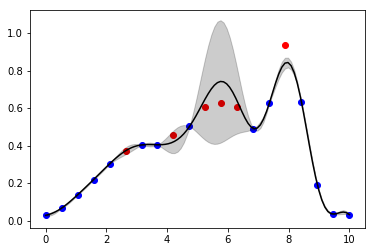

In [77]:
from sklearn.gaussian_process import GaussianProcessRegressor


df = pd.read_csv('datasets/three_regression_examples.csv')
fig, ax = plt.subplots()

x = df['0'].values
x = x.reshape(x.size,1)
y1 = df['1'].values
y1 = y1.reshape(y1.size,1)

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.3)

ax.scatter(x_train,y_train,color='b')
ax.scatter(x_test,y_test,color='r')

gpr = GaussianProcessRegressor()

gpr.fit(x_train,y_train)

x_dense = np.linspace(min(x),max(x),100)
x_dense = x_dense.reshape(x_dense.size,1)
y_gpr, y_std = gpr.predict(x_dense, return_std=True)


ax.plot(x_dense, y_gpr, color='k')
ax.fill_between(x_dense[:,0], y_gpr[:,0] - y_std, y_gpr[:,0] + y_std, color='k',alpha=0.2)


## Further reading

* [Hastie Elements of Statistical Learning Ch. 5](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)
* [Python data science handbook linear regression](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb)
* [Raschka regression discussion](https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html)
* [Scikit-learn PLS regression](http://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html)
* [Scikit=learn linear models](http://scikit-learn.org/stable/modules/linear_model.html)